<a href="https://colab.research.google.com/github/AydenRU/neural_networks-/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.com.am/d/-347I8g2yTpdmw) -o dataset.zip
! unzip -qq dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 2623M  100 2623M    0     0  12.9M      0  0:03:22  0:03:22 --:--:-- 13.4M


In [ ]:
imagePaths = sorted(list(paths.list_images("/content/dataset")))
random.shuffle(imagePaths)

In [ ]:
def load_images(imagePaths, compression_size = 224):

  data = []
  labels = []

  for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (compression_size, compression_size))
    data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

  return data, labels

In [ ]:
compression_size = 224

data, labels = load_images(imagePaths, compression_size)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
(X_train, X_val, Y_train, Y_val) = train_test_split(data, labels,
                                                  test_size=0.25,
																									random_state=42)

In [ ]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

In [ ]:
input_shape = (compression_size, compression_size, 3)
print(input_shape)

(224, 224, 3)


In [ ]:
model = keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
model.trainable = False

In [ ]:
my_model = Sequential()
my_model.add(model)
my_model.add(Flatten())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(256, activation='relu'))
my_model.add(Dense(128, activation='relu'))
my_model.add(Dense(10, activation='softmax'))

In [ ]:
data = []

In [ ]:
INIT_LR = 0.00001
EPOCHS = 70

In [ ]:
opt = Adam(learning_rate=INIT_LR)

my_model.compile(loss="categorical_crossentropy", optimizer=opt,
																					metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)

checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0)

In [ ]:
H = my_model.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              epochs=EPOCHS,
              batch_size=50,
              callbacks=[early_stopping, checkpoint])

Epoch 1/70
23/23 [==============================] - ETA: 0s - loss: 2.2990 - accuracy: 0.1634

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 17s 414ms/step - loss: 2.2990 - accuracy: 0.1634 - val_loss: 2.2940 - val_accuracy: 0.2383
Epoch 2/70
23/23 [==============================] - 4s 178ms/step - loss: 2.2904 - accuracy: 0.3144 - val_loss: 2.2851 - val_accuracy: 0.3742
Epoch 3/70
23/23 [==============================] - 4s 176ms/step - loss: 2.2805 - accuracy: 0.4010 - val_loss: 2.2738 - val_accuracy: 0.4314
Epoch 4/70
23/23 [==============================] - 4s 190ms/step - loss: 2.2674 - accuracy: 0.4458 - val_loss: 2.2584 - val_accuracy: 0.4687
Epoch 5/70
23/23 [==============================] - 5s 228ms/step - loss: 2.2495 - accuracy: 0.4707 - val_loss: 2.2375 - val_accuracy: 0.4834
Epoch 6/70
23/23 [==============================] - 4s 193ms/step - loss: 2.2257 - accuracy: 0.4805 - val_loss: 2.2103 - val_accuracy: 0.4927
Epoch 7/70
23/23 [==============================] - 5s 201ms/step - loss: 2.1948 - accuracy: 0.4925 - val_loss: 2.1750 - val_accuracy: 0.5020
Epoch 8/70
23/23

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
predictions = model.predict(X_val, batch_size=100)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

8/8 [==============================] - 2s 119ms/step
                                          precision    recall  f1-score   support

                Apple___Cedar_apple_rust       0.73      0.78      0.75        76
                         Apple___healthy       0.70      0.69      0.70        78
Cherry_(including_sour)___Powdery_mildew       0.78      0.78      0.78        58
       Cherry_(including_sour)___healthy       0.81      0.79      0.80        84
     Corn_(maize)___Northern_Leaf_Blight       0.94      0.83      0.88        77
                  Corn_(maize)___healthy       0.87      0.99      0.93        75
                    Potato___Late_blight       0.63      0.63      0.63        71
                        Potato___healthy       0.63      0.76      0.69        76
                    Tomato___Late_blight       0.81      0.70      0.75        87
                        Tomato___healthy       0.65      0.59      0.62        69

                                accuracy   

In [ ]:
print(lb)

LabelBinarizer()


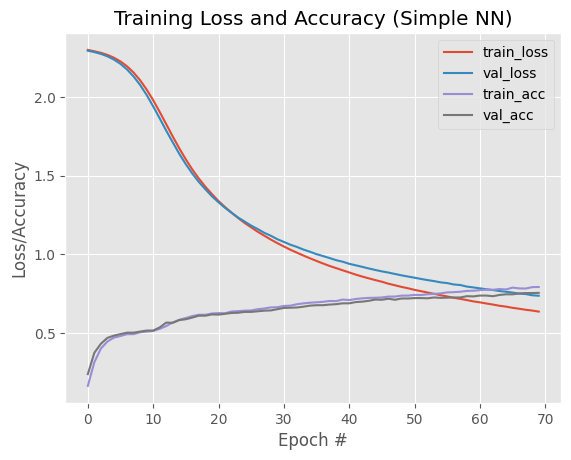

In [ ]:
N = np.arange(0, 70)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

24/24 [==============================] - 4s 116ms/step


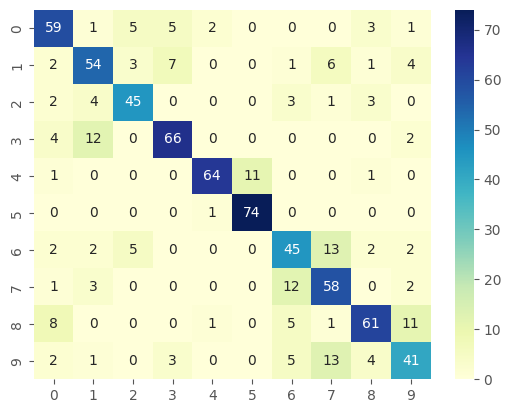

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_val, batch_size=32)
Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)
conf_mat = confusion_matrix(Y_val, Y_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()


In [ ]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):

    model.save(model_path, save_format="h5")

    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [ ]:
model_path = "model_work.h5"
labels_path = "label_bin"

In [ ]:
save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install gradio

In [ ]:
from tensorflow import keras
from keras.models import load_model
import gradio as gr
import pickle
import cv2

In [ ]:
def preprocess_image(img, compression_size = 224):

    image = img.copy()
    image = cv2.resize(image, (compression_size, compression_size))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((1, compression_size, compression_size, 3))

    return image

In [ ]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "/content/model_work.h5", label_path = "/content/label_bin"):

    model = load_model(model_path)
    lb = pickle.loads(open(label_path, "rb").read())

    image = preprocess_func(img.copy())
    cv2_imshow(image[0])
    preds = model.predict(image).flatten()

    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}
    print(confidences)

    return confidences

In [ ]:
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(label="Изображение"),
    outputs= gr.Label(num_top_classes=len(labels_path)))

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://bec588c6cfbe06b748.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


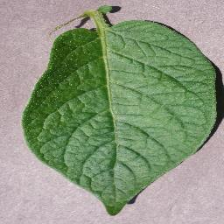

1/1 [==============================] - 1s 1s/step
{'Apple___Cedar_apple_rust': 0.06164156645536423, 'Apple___healthy': 0.10161204636096954, 'Cherry_(including_sour)___Powdery_mildew': 0.14676238596439362, 'Cherry_(including_sour)___healthy': 0.1287173479795456, 'Corn_(maize)___Northern_Leaf_Blight': 0.02089599333703518, 'Corn_(maize)___healthy': 0.015230227261781693, 'Potato___Late_blight': 0.1611403077840805, 'Potato___healthy': 0.09441759437322617, 'Tomato___Late_blight': 0.10691197216510773, 'Tomato___healthy': 0.1626705825328827}


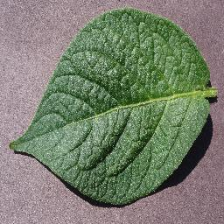

1/1 [==============================] - 1s 790ms/step
{'Apple___Cedar_apple_rust': 0.0022792702075093985, 'Apple___healthy': 0.005630836822092533, 'Cherry_(including_sour)___Powdery_mildew': 0.08703241497278214, 'Cherry_(including_sour)___healthy': 0.0003604005032684654, 'Corn_(maize)___Northern_Leaf_Blight': 6.68605716782622e-05, 'Corn_(maize)___healthy': 4.49974431830924e-05, 'Potato___Late_blight': 0.680888295173645, 'Potato___healthy': 0.16749823093414307, 'Tomato___Late_blight': 0.028723279014229774, 'Tomato___healthy': 0.02747538685798645}


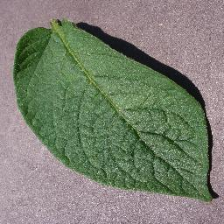

1/1 [==============================] - 1s 1s/step
{'Apple___Cedar_apple_rust': 0.03382953628897667, 'Apple___healthy': 0.2840236723423004, 'Cherry_(including_sour)___Powdery_mildew': 0.031553156673908234, 'Cherry_(including_sour)___healthy': 0.37755370140075684, 'Corn_(maize)___Northern_Leaf_Blight': 0.046970926225185394, 'Corn_(maize)___healthy': 0.024606971070170403, 'Potato___Late_blight': 0.024076851084828377, 'Potato___healthy': 0.07943253964185715, 'Tomato___Late_blight': 0.011472605168819427, 'Tomato___healthy': 0.08647998422384262}


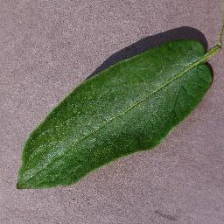

1/1 [==============================] - 1s 996ms/step
{'Apple___Cedar_apple_rust': 0.00886061042547226, 'Apple___healthy': 0.06808703392744064, 'Cherry_(including_sour)___Powdery_mildew': 0.008744572289288044, 'Cherry_(including_sour)___healthy': 0.12019682675600052, 'Corn_(maize)___Northern_Leaf_Blight': 0.4842539429664612, 'Corn_(maize)___healthy': 0.26007673144340515, 'Potato___Late_blight': 0.003911664243787527, 'Potato___healthy': 0.034887295216321945, 'Tomato___Late_blight': 0.003751736367121339, 'Tomato___healthy': 0.007229592651128769}


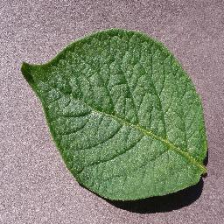

1/1 [==============================] - 1s 776ms/step
{'Apple___Cedar_apple_rust': 0.01219200436025858, 'Apple___healthy': 0.22196203470230103, 'Cherry_(including_sour)___Powdery_mildew': 0.016610659658908844, 'Cherry_(including_sour)___healthy': 0.3472468852996826, 'Corn_(maize)___Northern_Leaf_Blight': 0.05033847317099571, 'Corn_(maize)___healthy': 0.08276402950286865, 'Potato___Late_blight': 0.017247045412659645, 'Potato___healthy': 0.11496464908123016, 'Tomato___Late_blight': 0.012798016890883446, 'Tomato___healthy': 0.12387622892856598}


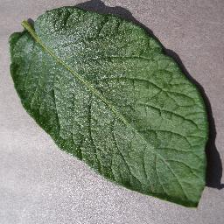

1/1 [==============================] - 1s 773ms/step
{'Apple___Cedar_apple_rust': 0.003047734498977661, 'Apple___healthy': 0.012974711135029793, 'Cherry_(including_sour)___Powdery_mildew': 0.011174457147717476, 'Cherry_(including_sour)___healthy': 0.01742345467209816, 'Corn_(maize)___Northern_Leaf_Blight': 0.33490505814552307, 'Corn_(maize)___healthy': 0.5444237589836121, 'Potato___Late_blight': 0.008256152272224426, 'Potato___healthy': 0.04298803210258484, 'Tomato___Late_blight': 0.016068056225776672, 'Tomato___healthy': 0.00873858667910099}


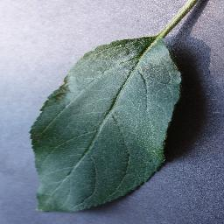

1/1 [==============================] - 1s 785ms/step
{'Apple___Cedar_apple_rust': 0.0018160408362746239, 'Apple___healthy': 0.032874468713998795, 'Cherry_(including_sour)___Powdery_mildew': 0.0012338022934272885, 'Cherry_(including_sour)___healthy': 0.10353654623031616, 'Corn_(maize)___Northern_Leaf_Blight': 0.2684585452079773, 'Corn_(maize)___healthy': 0.5762825012207031, 'Potato___Late_blight': 0.00047003795043565333, 'Potato___healthy': 0.011802248656749725, 'Tomato___Late_blight': 0.0008616302511654794, 'Tomato___healthy': 0.0026641832664608955}


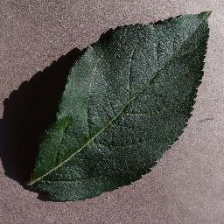

1/1 [==============================] - 1s 782ms/step
{'Apple___Cedar_apple_rust': 7.999904482858256e-06, 'Apple___healthy': 3.856057082884945e-05, 'Cherry_(including_sour)___Powdery_mildew': 6.956392098800279e-06, 'Cherry_(including_sour)___healthy': 0.00047857026220299304, 'Corn_(maize)___Northern_Leaf_Blight': 0.16125914454460144, 'Corn_(maize)___healthy': 0.8381203413009644, 'Potato___Late_blight': 1.0982925005009747e-06, 'Potato___healthy': 2.83254175883485e-05, 'Tomato___Late_blight': 4.104712570551783e-05, 'Tomato___healthy': 1.7975580703932792e-05}


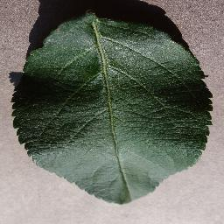

1/1 [==============================] - 1s 770ms/step
{'Apple___Cedar_apple_rust': 0.0014258772134780884, 'Apple___healthy': 0.002796409884467721, 'Cherry_(including_sour)___Powdery_mildew': 0.06741505861282349, 'Cherry_(including_sour)___healthy': 0.0001872562279459089, 'Corn_(maize)___Northern_Leaf_Blight': 0.00015089627413544804, 'Corn_(maize)___healthy': 0.00013208964082878083, 'Potato___Late_blight': 0.6746363639831543, 'Potato___healthy': 0.18332214653491974, 'Tomato___Late_blight': 0.04745379462838173, 'Tomato___healthy': 0.02248009853065014}


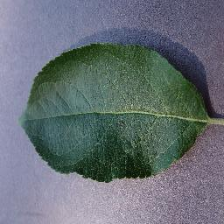

1/1 [==============================] - 1s 760ms/step
{'Apple___Cedar_apple_rust': 0.00027633417630568147, 'Apple___healthy': 0.009234786033630371, 'Cherry_(including_sour)___Powdery_mildew': 0.0001694007369223982, 'Cherry_(including_sour)___healthy': 0.019993139430880547, 'Corn_(maize)___Northern_Leaf_Blight': 0.3353573977947235, 'Corn_(maize)___healthy': 0.6297697424888611, 'Potato___Late_blight': 6.842496804893017e-05, 'Potato___healthy': 0.004830198362469673, 'Tomato___Late_blight': 9.878428681986406e-05, 'Tomato___healthy': 0.00020181189756840467}
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bec588c6cfbe06b748.gradio.live


In [ ]:
interface.launch(share=True, debug=True)